In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

# About the Data:

This dataset was assembled as part of my Capstone Project for Thinkful's Data Science Bootcamp. I wanted to perform EDA on Movie profits in combination with MovieLens and IMDb ratings.
The dataset lists 609 movies including information on the movie title, director, duration, release date, genre, IMDb rating, MovieLens Rating and the associated profits. The MovieLens ratings are on a scale of 1-5 where as IMDb ratings are on a scale of 1 - 10.

We will focus on three key questions:

1) What areas have the most influence on revenue?

2) How is a movie's revenue and average score affected by its genre?

3) Did the movie production business earn profit over the year?

Let's begin by loading the data.

In [2]:
movie_df = pd.read_csv('movie_ratings.csv')

# Let's add a new column year which will have just the year extracted from release date column.
# This will allows us to see how profit is trending which is the third question.
movie_df["year"] = movie_df['Release Date'].str[-4:]


In [3]:
# Let's add a new column Month which will have just the month extracted from release date column.
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def get_month(x):
    try:
        return month_order[int(str(x).split('/')[1]) - 1]
    except:
        return np.nan

In [4]:
movie_df['month'] = movie_df['Release Date'].apply(get_month)

In [5]:
# Before diving into the analysis, let's look at the data
print(movie_df.head())

  Day of Week                  Director   Genre        Movie Title  \
0      Friday                 Brad Bird  action       Tomorrowland   
1      Friday               Scott Waugh  action     Need for Speed   
2      Friday            Patrick Hughes  action  The Expendables 3   
3      Friday  Phil Lord & Chris Miller  comedy     21 Jump Street   
4      Friday           Roland Emmerich  action   White House Down   

  Release Date               Studio  Adjusted Gross ($mill)  Budget ($mill)  \
0   22/05/2015  Buena Vista Studios                   202.1           170.0   
1   14/03/2014  Buena Vista Studios                   204.2            66.0   
2   15/08/2014            Lionsgate                   207.1           100.0   
3   16/03/2012                 Sony                   208.8            42.0   
4   28/06/2013                 Sony                   209.7           150.0   

   Gross ($mill)  IMDb Rating  MovieLens Rating  Overseas ($mill)  Overseas%  \
0          202.1        

 # 1. What areas have the most influence on revenue?

Release Dates can often play a very important role in determining the revenue generated by a particular movie. 
In this section, we will try and gain insights about release dates in terms of months and days of the week.

# 1.1.
Let's analyse revenue percentage for different days. Is there any day which earns more than others?

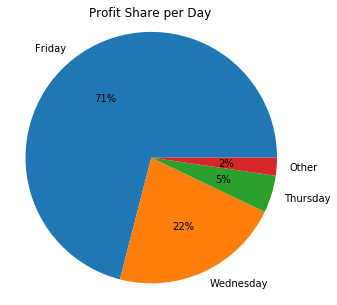

In [6]:
plt.figure(figsize=(5,5))
total_profit = movie_df['Profit ($mill)'].sum()
profit_day=pd.DataFrame(movie_df.groupby('Day of Week')[['Profit ($mill)']].sum())
profit_day['profit percentage']= profit_day.loc[:,'Profit ($mill)'] /total_profit * 100
profit_day= profit_day.sort_values(by=['profit percentage'], ascending=False)

main_days = profit_day.iloc[:3,1]
main_days.loc['Other']= profit_day.iloc[3:,1].sum()
main_days= main_days.reset_index()

plt.pie(main_days['profit percentage'], labels= main_days['Day of Week'], autopct='%1.0f%%' )
plt.axis('equal')
plt.title("Profit Share per Day")
plt.show()

The label "Other" includes Tuesday, Saturday and Sunday. We don't have any data for Monday in our dataset.

Friday is generating approximately 71% of revenue while other days are generating less revenue. 

This is understandable considering the fact that friday is the beginning of the weekend and people are more likely to watch a movie on Friday instead of Monday or Tuesday.

# 1.2. 
Let's analyse average revenue for different months.

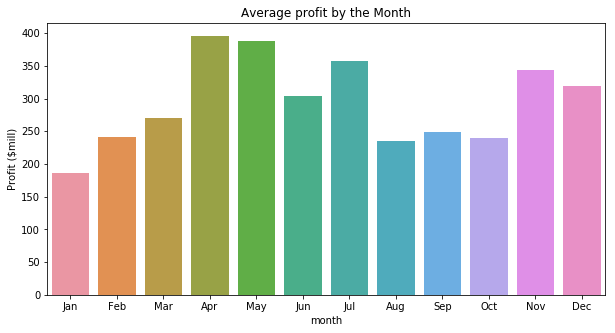

In [8]:
monthly_mean = pd.DataFrame(movie_df.groupby('month')[['Profit ($mill)']].mean())
monthly_mean = monthly_mean.reset_index()
#print(monthly_mean['month'])
plt.figure(figsize=(10,5))
plt.title("Average profit by the Month")
sns.barplot(x='month', y='Profit ($mill)', data=monthly_mean, order=month_order)
plt.show()

We see that the months of "April" and "May" have the highest average profit. 

This may be because, April and May being the vacation time and people are more likely to spend time on entertainment.

# 1.3.
What is the average run time for movies? Is a lengthy movie generating more revenues?

In [9]:
print(movie_df['Runtime (min)'].describe())

count    608.000000
mean     117.781250
std       23.179122
min       30.000000
25%      100.000000
50%      116.000000
75%      130.250000
max      238.000000
Name: Runtime (min), dtype: float64


The average length of a movie is approximately 117 minute. 
The longest movie in this dataset is a staggering 238 minutes or approximately 4 hours.

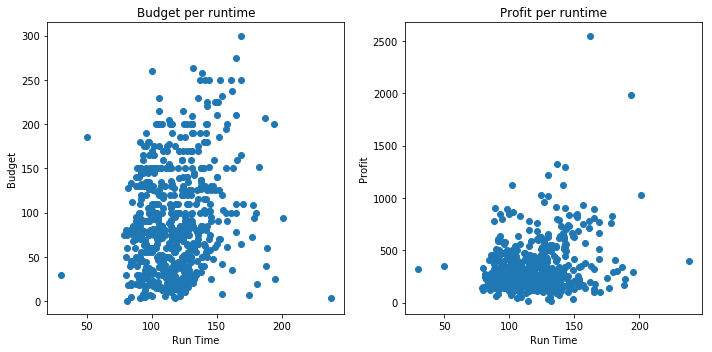

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Budget per runtime')
plt.xlabel('Run Time')
plt.ylabel('Budget')
plt.scatter(x= movie_df['Runtime (min)'], y= movie_df['Budget ($mill)'])
plt.subplot(1,2,2)
plt.title('Profit per runtime')
plt.xlabel('Run Time')
plt.ylabel('Profit')
plt.scatter(x= movie_df['Runtime (min)'], y= movie_df['Profit ($mill)'])
plt.tight_layout()
plt.show()

We did not find any linear relation between length of movie and its associated budget or profit though there are few long running movies with high budget and high profit.

# 1.4.
Let's see which production companies are there in the business and who are the Highest Earning Production Companies

In [11]:
print(movie_df.Studio.unique())

['Buena Vista Studios' 'Lionsgate' 'Sony' 'Universal' 'Paramount Pictures'
 'WB' 'Weinstein Company' 'UA Entertainment' 'WB/New Line'
 'New Line Cinema' 'Fox' 'TriStar' 'Relativity Media' 'Screen Gems'
 'StudioCanal' 'Fox Searchlight Pictures' 'MiraMax' 'Path_ Distribution'
 'DreamWorks' 'Lionsgate Films' 'Revolution Studios' 'Dimension Films'
 'USA' 'Lionsgate/Summit' 'Sony Picture Classics' 'Pacific Data/DreamWorks'
 'Disney' 'Art House Studios' 'Colombia Pictures' 'Gramercy Pictures'
 'Summit Entertainment' 'Vestron Pictures' 'MGM' 'Orion' 'IFC'
 'New Market Films']


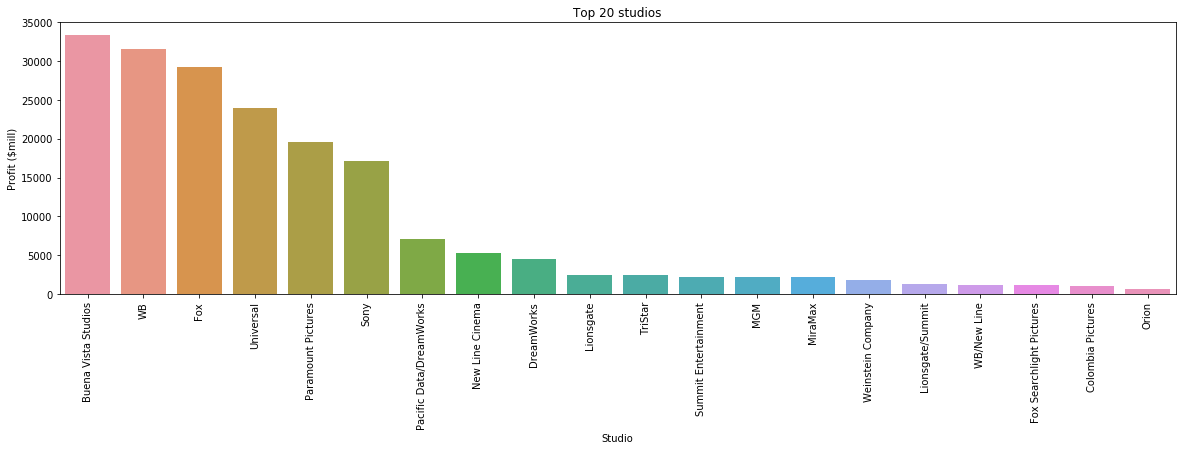

                Studio  Profit ($Bill)
0  Buena Vista Studios            33.0
1                   WB            32.0
2                  Fox            29.0


In [12]:
#Since there are so many, Let's see the 20 studios who are earning more revenue
plt.figure(figsize=(20,5))
studio_df =movie_df.groupby('Studio')[['Profit ($mill)']].sum()
Top_20 = studio_df.sort_values(by = 'Profit ($mill)', ascending = False).head(20).reset_index()
sns.barplot(x='Studio', y='Profit ($mill)', data=Top_20)
plt.title('Top 20 studios')
plt.xticks(rotation=90)
plt.show()
# To show the values of Top 3 studios
val= pd.DataFrame({'Studio':Top_20.iloc[:3,0],'Profit ($Bill)': round(Top_20.iloc[:3,1]/1000)} )
print(val.loc[:,['Studio','Profit ($Bill)']])

Buena Vista Studio is the highest earning production company earning a 33 billion dollars from 609 movies. WB and FOX are the second and the third highest earning companies with 32 billion dollars and 29 billion dollars in revenue respectively.

# 1.5.
Is the Movie rating influencing the revenue? 

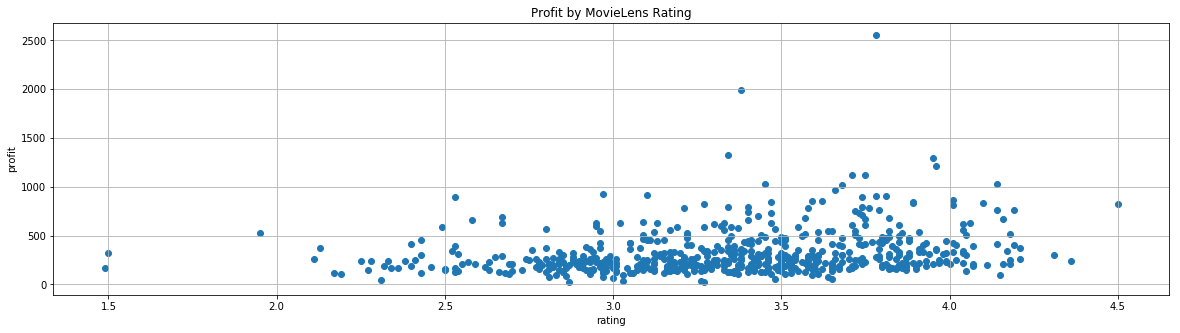

In [13]:
plt.figure(figsize=(20,5))
plt.scatter(x=movie_df['MovieLens Rating'], y=movie_df['Profit ($mill)'])
plt.ylabel('profit')
plt.xlabel('rating')
plt.title("Profit by MovieLens Rating")
plt.grid(True)
plt.show()

By looking at the above figure, we didn't find any correlation between the ratings and profit.
There are movies who are high rated but the profit is less than the blockbuster one's'.  
Let's analyse more on this.

In [14]:
'''
we organized the IMDb reviews by categories:
< 2.5 terrible
2.5 < bad < 5
5 < average < 7.5
7.5 < good < 10
'''
def f_imdb_category(x):
    if x >= 7.5:
        return 'Good'
    elif x >= 5:
        return 'Average'
    elif x >= 2.5:
        return 'Bad'
    else:
        return 'Terrible'
movie_df['imdb_Rate_Category'] =  movie_df['IMDb Rating'].apply(f_imdb_category)    

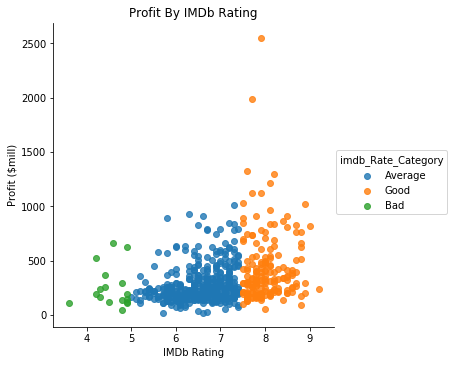

In [15]:
df= movie_df.loc[:,['IMDb Rating','imdb_Rate_Category','Profit ($mill)']]
plt.figure(figsize=(20,5))
sns.lmplot( x= "IMDb Rating", y= "Profit ($mill)" , data=df , fit_reg=False, hue='imdb_Rate_Category', legend=True)
plt.title('Profit By IMDb Rating')
plt.show()

When we divided the ratings into categories, we can find that though there is no direct relationship between rating and profit, few good movies are there who earned more than rest of others.

# 2. How is a movie's revenue and average score affected by its genre?

# 2.1

In [16]:
#Let's find out the Genre categories for the movies
print(movie_df.Genre.unique())

['action' 'comedy' 'adventure' 'horror' 'animation' 'biography' 'drama'
 'musical' 'sci-fi' 'crime' 'romance' 'fantasy' 'mystery' 'thriller'
 'documentary']


In [17]:
#Let us now have a look at the commonly occuring genres in movies.
pop_gen = pd.DataFrame(movie_df['Genre'].value_counts()).reset_index()
pop_gen.columns = ['Genre', 'Movies']
print(pop_gen)

          Genre  Movies
0        action     237
1     animation      97
2        comedy      91
3         drama      52
4     adventure      50
5        sci-fi      15
6      thriller      15
7     biography      14
8         crime      10
9        horror       8
10      fantasy       6
11      romance       6
12      mystery       3
13  documentary       2
14      musical       2


We have 15 different Genres for the movie. Let's analyse the top 10 genres.

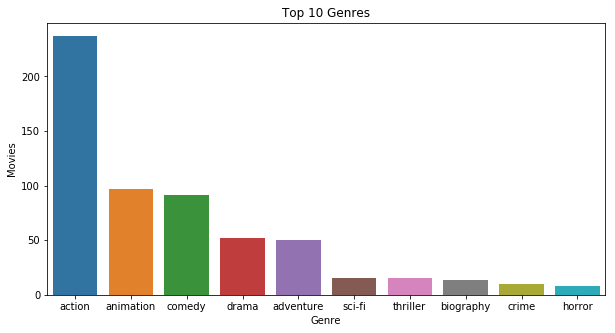

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Movies', data=pop_gen.head(10))
plt.title('Top 10 Genres')
plt.show()


The action movies are the most commonly occurring genre while Other major genres represented in the top 10 are animation, comedy, drama and adventure . Let's analyse the profits for top 10 genres.

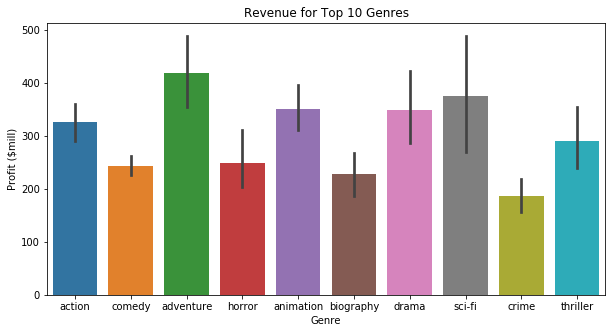

In [19]:
plt.figure(figsize=(10,5))
genres_list = ['action','animation','comedy','drama','adventure','sci-fi','thriller','biography','crime','horror']
top_10_genres = movie_df.loc[movie_df['Genre'].isin(genres_list)]
sns.barplot( x= "Genre", y= "Profit ($mill)" , data=top_10_genres)
plt.title('Revenue for Top 10 Genres')
plt.legend(loc='best')
#plt.grid(True)
plt.show()

It seems like Adventure Movies tend to yield the highest profit on average. 
This could be because of the blockbuster movies like "Alice in Wonderland", "Harry Potter" and "Jurassic Park" which were low budget movies yet producing huge profits. 

The Scifi movies is earning second highest profit. 

Action movies, though most common category, didn't get better average profit. Let's analyse Action movies to find out the reason.

	Mean : 	325							Mean : 	350
	Median : 236.0							Median : 281.0


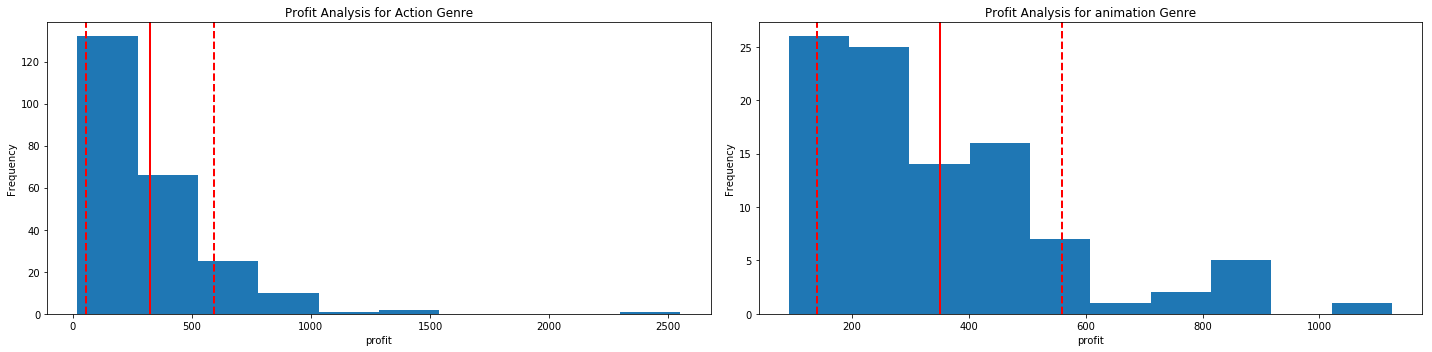

In [20]:
action_genre = movie_df.loc[movie_df['Genre']=='action']
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(action_genre['Profit ($mill)'])
mean_profit = np.mean(action_genre['Profit ($mill)'])
median_profit = np.median(action_genre['Profit ($mill)'])
std_dev = action_genre['Profit ($mill)'].std()
plt.axvline(mean_profit, linestyle='solid', linewidth=2, color='r')
plt.axvline(mean_profit + std_dev , linestyle='dashed', linewidth=2, color='r')
plt.axvline(mean_profit - std_dev , linestyle='dashed', linewidth=2, color='r')
plt.xlabel('profit')
plt.ylabel('Frequency')
plt.title('Profit Analysis for Action Genre')

plt.subplot(1,2,2)
animation_genre = movie_df.loc[movie_df['Genre']=='animation']
plt.hist(animation_genre['Profit ($mill)'])
mean_profit1 = np.mean(animation_genre['Profit ($mill)'])
median_profit1 = np.median(animation_genre['Profit ($mill)'])
std_dev1 = animation_genre['Profit ($mill)'].std()
plt.axvline(mean_profit1, linestyle='solid', linewidth=2, color='r')
plt.axvline(mean_profit1 + std_dev1 , linestyle='dashed', linewidth=2, color='r')
plt.axvline(mean_profit1 - std_dev1 , linestyle='dashed', linewidth=2, color='r')
plt.xlabel('profit')
plt.ylabel('Frequency')
plt.title('Profit Analysis for animation Genre')

print('\t' + 'Mean : ' + '\t' + str(round(mean_profit)) + '\t' + '\t' + '\t' + '\t' + '\t' + '\t' + '\t' +   'Mean : ' + '\t' + str(round(mean_profit1)))
print('\t' + 'Median : ' +  str(round(median_profit)) + '\t' + '\t' + '\t' + '\t' + '\t' + '\t' + '\t' +   'Median : ' +  str(round(median_profit1)))
plt.tight_layout()
plt.show()

As the figure shows, most of the Action movies earn less than it's average profit. 
Because of this, though produced in large numbers, action movies could not get a good ranking like adventure movies.
The same goes for Animation Movies.

# 2.2

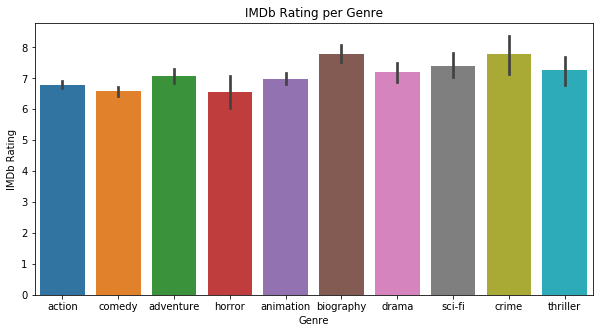

In [21]:
few_genre= ['action','animation','comedy','drama','adventure','sci-fi','thriller','biography','crime','horror']
top_10_genres = movie_df.loc[movie_df['Genre'].isin(few_genre)]
plt.figure(figsize=(10,5))
sns.barplot( x= "Genre", y= "IMDb Rating" , data=top_10_genres)
plt.title('IMDb Rating per Genre')
plt.legend(loc='best')
plt.show()

In [22]:
average_rating = pd.DataFrame(top_10_genres.groupby('Genre')['IMDb Rating'].mean()).sort_values(by='IMDb Rating' , ascending=False).reset_index()
print(average_rating.round(1).head(3))

       Genre  IMDb Rating
0  biography          7.8
1      crime          7.8
2     sci-fi          7.4


As per this dataset, Both Crime and Biography movies are the highest rated movies followed by scifi.
The movies listed in both crime and Biography are very popular movies though couldn't manage to earn more profit.

# 3. Did the movie production business earn profit over the year?

# 3.1

Let's analyse the profit growth over the years

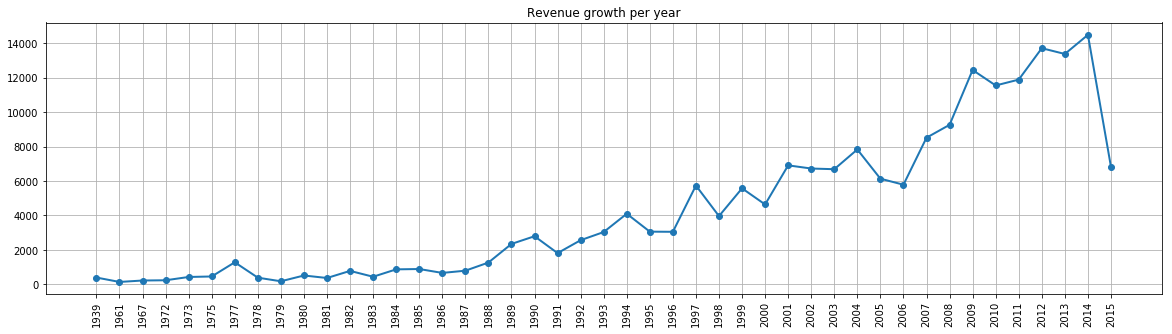

In [23]:
year_profit = movie_df.groupby('year')['Profit ($mill)'].sum()
plt.figure(figsize=(20,5))
plt.plot(year_profit,marker='o',linewidth=2)
plt.xticks(rotation=90)
plt.title('Revenue growth per year')
plt.grid(True)
plt.show()

There is a profit growth over the years with few ups and downs in between, with a sharp drop at 2015, 
may be because the dataset for 2015 is not complete or there are less movies produced in 2015.

In [24]:
last_5_years = movie_df.loc[movie_df['year'].isin(['2011','2012','2013','2014','2015'])]   
Movie_count = last_5_years.groupby('year')['Movie Title'].count().reset_index().rename(columns={'year':'Year' ,'Movie Title':'Movie Count'})
print(Movie_count)

   Year  Movie Count
0  2011           34
1  2012           37
2  2013           39
3  2014           42
4  2015           16


# 3.2

Let's analyse the US and Worldwide profit for past 5 Years.

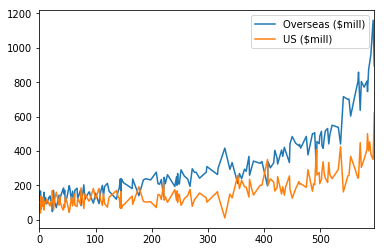

In [25]:
recent_years= movie_df.loc[movie_df['year'].isin(['2011','2012','2013','2014','2015']),['year','Overseas ($mill)','US ($mill)']]
recent_years.plot()
plt.show()

We observe that the movies are earning more in overseas than US for last 5 years. 

Let's check that by doing a T-test

Null hypothesis : movies are earning same both overseas and US.
Alternate hypothesis : there is difference.

In [26]:
ovs_earn = movie_df['Overseas ($mill)']
us_earn = movie_df['US ($mill)']

print('values from ttest : ', ttest_ind(ovs_earn, us_earn, equal_var=False))

values from ttest :  Ttest_indResult(statistic=9.4591787338450146, pvalue=2.659531425230859e-20)


The pvalue is very much less than 0.05. 

So we reject the Null hypothesis and conclude that "movies are earning more in overseas than US"

# 3.3
Let's analyse which genre is rising since the last 5 years (based on average profit)

In [27]:
genres_list = ['action','animation','comedy','drama','adventure','sci-fi','thriller','biography','crime','horror']
last_5_year_top_10_genre = last_5_years[last_5_years['Genre'].isin(genres_list)]
profit_dis = last_5_year_top_10_genre.groupby(['year','Genre'])['Profit ($mill)'].mean()
g = profit_dis.groupby(level=0, group_keys=False)
print(g.nlargest(2))

year  Genre    
2011  adventure    584.700000
      sci-fi       388.800000
2012  adventure    423.220000
      action       412.320000
2013  adventure    501.850000
      animation    439.322222
2014  adventure    396.616667
      action       353.509091
2015  action       536.611111
      drama        486.850000
Name: Profit ($mill), dtype: float64


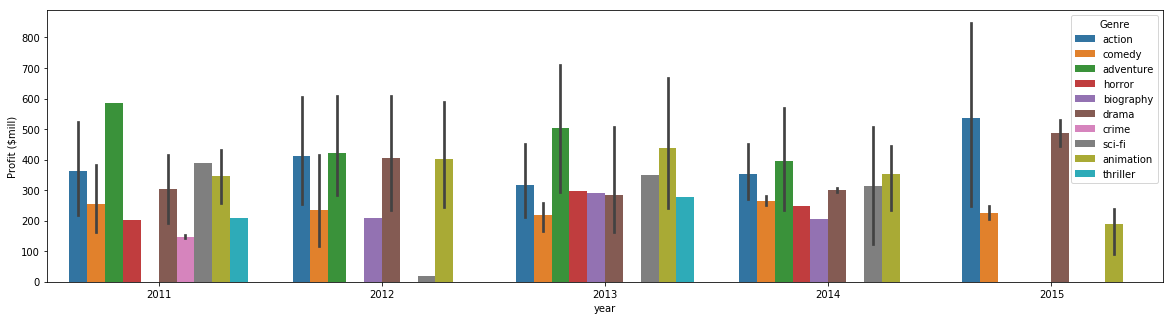

In [28]:
plt.figure(figsize=(20,5))
sns.barplot( x= "year", y= "Profit ($mill)" , data=last_5_year_top_10_genre ,  hue="Genre")
plt.show()

Adventure movies are earning more than the other genres. 
Again, data might be incomplete for year 2015. 

# Conclusion

Analysing the Movie Ratings dataset gave many interesting insights into the movie business. we were able to extract some trends in the data. We found that most of the movies make more profit outside of the US. Good movies still make more money than average and bad movies.Also movies are in profit as time goes on.

These are the overall conclusion we may draw from our dataset. As we already mentioned, this dataset might be lacking few informations while some of the variables we used might be skewed. Having a larger and more representative Dataset would allow us to draw better insights. 
In future I'd like to understand if these results are statistically significant. Also, it would be great to predict the revenue of a movie to a certain degree or predict if a movie will be a hit or not.